### Import libraries

In [79]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Define features

In [80]:
# Define the number of entities
num_entities = 5000

# Define value ranges and probabilities for "Low" risk entities
clients_range_low = [(11, 200)]
infraction_types_low = ['None', 'Minor', 'Major']
infraction_type_probs_low = [0.9, 0.08, 0.02]
infraction_timelines_low = ['None', 'Within past year', 'Within past 1-3 years']
infraction_timeline_probs_low = [0.9, 0.05, 0.05]
complaints_low = ['None', 'Minor', 'Major']
complaints_probs_low = [0.9, 0.08, 0.02]
sentiments_low = ['None', 'Flagged']
sentiments_probs_low = [0.8, 0.2]
inspection_results_low = ['Pass', 'Fail', 'None']
inspection_results_probs_low = [0.9, 0.08, 0.02]

# Define value ranges and probabilities for "Moderate" risk entities
clients_range_moderate = [(201, 500)]
infraction_types_moderate = ['None', 'Minor', 'Major']
infraction_type_probs_moderate = [0.4, 0.4, 0.2]
infraction_timelines_moderate = ['None', 'Within past year', 'Within past 1-3 years']
infraction_timeline_probs_moderate = [0.4, 0.3, 0.3]
complaints_moderate = ['None', 'Minor', 'Major']
complaints_probs_moderate = [0.4, 0.4, 0.2]
sentiments_moderate = ['None', 'Flagged']
sentiments_probs_moderate = [0.7, 0.3]
inspection_results_moderate = ['Pass', 'Fail', 'None']
inspection_results_probs_moderate = [0.4, 0.4, 0.2]

# Define value ranges and probabilities for "High" risk entities
clients_range_high = [(501, 1000)]
infraction_types_high = ['None', 'Minor', 'Major']
infraction_type_probs_high = [0.1, 0.3, 0.6]
infraction_timelines_high = ['None', 'Within past year', 'Within past 1-3 years']
infraction_timeline_probs_high = [0.1, 0.6, 0.3]
complaints_high = ['None', 'Minor', 'Major']
complaints_probs_high = [0.1, 0.3, 0.6]
sentiments_high = ['None', 'Flagged']
sentiments_probs_high = [0.1, 0.9]
inspection_results_high = ['Pass', 'Fail', 'None']
inspection_results_probs_high = [0.1, 0.3, 0.6]


### Define Functions

In [81]:
# Function to generate a random number of clients based on risk level
def random_clients(risk_level):
    if risk_level == 'Low':
        choice = clients_range_low[0]
    elif risk_level == 'Moderate':
        choice = clients_range_moderate[0]
    else:
        choice = clients_range_high[0]
    return random.randint(choice[0], choice[1])

# Function to determine risk category based on total risk score
def get_risk_category(risk_score):
    if risk_score < 7:
        return 'Low'
    elif 7 <= risk_score <= 12:
        return 'Moderate'
    else:
        return 'High'

### Synthetic Data generation

In [82]:
# Generate the data
data = []

# Generate 90% low risk entities
for i in range(int(num_entities * 0.9)):
    entity_id = f"E{i:04d}"
    annual_clients = random_clients('Low')
    infraction_type = random.choices(infraction_types_low, infraction_type_probs_low)[0]
    infraction_timeline = random.choices(infraction_timelines_low, infraction_timeline_probs_low)[0]
    public_complaints = random.choices(complaints_low, complaints_probs_low)[0]
    sentiment_analysis = random.choices(sentiments_low, sentiments_probs_low)[0]
    inspection_result = random.choices(inspection_results_low, inspection_results_probs_low)[0]

    # Calculate the risk score
    risk_score = 0
    risk_score += 1 if annual_clients < 200 else 2 if annual_clients <= 500 else 3
    risk_score += 1 if infraction_type == 'None' else 2 if infraction_type == 'Minor' else 3
    risk_score += 1 if infraction_timeline == 'None' else 3 if infraction_timeline == 'Within past year' else 2
    risk_score += 1 if public_complaints == 'None' else 2 if public_complaints == 'Minor' else 3
    risk_score += 1 if sentiment_analysis == 'None' else 2
    risk_score += 1 if inspection_result == 'Pass' else 2 if inspection_result == 'Fail' else 3

    # Determine risk category
    risk_category = get_risk_category(risk_score)

    data.append([
        entity_id, annual_clients, infraction_type, infraction_timeline,
        public_complaints, sentiment_analysis, inspection_result, risk_score, risk_category
    ])

# Generate 5% moderate risk entities
for i in range(int(num_entities * 0.05)):
    entity_id = f"E{int(num_entities * 0.9) + i:04d}"
    annual_clients = random_clients('Moderate')
    infraction_type = random.choices(infraction_types_moderate, infraction_type_probs_moderate)[0]
    infraction_timeline = random.choices(infraction_timelines_moderate, infraction_timeline_probs_moderate)[0]
    public_complaints = random.choices(complaints_moderate, complaints_probs_moderate)[0]
    sentiment_analysis = random.choices(sentiments_moderate, sentiments_probs_moderate)[0]
    inspection_result = random.choices(inspection_results_moderate, inspection_results_probs_moderate)[0]

    # Calculate the risk score
    risk_score = 0
    risk_score += 1 if annual_clients < 200 else 2 if annual_clients <= 500 else 3
    risk_score += 1 if infraction_type == 'None' else 2 if infraction_type == 'Minor' else 3
    risk_score += 1 if infraction_timeline == 'None' else 3 if infraction_timeline == 'Within past year' else 2
    risk_score += 1 if public_complaints == 'None' else 2 if public_complaints == 'Minor' else 3
    risk_score += 1 if sentiment_analysis == 'None' else 2
    risk_score += 1 if inspection_result == 'Pass' else 2 if inspection_result == 'Fail' else 3

    # Determine risk category
    risk_category = get_risk_category(risk_score)

    data.append([
        entity_id, annual_clients, infraction_type, infraction_timeline,
        public_complaints, sentiment_analysis, inspection_result, risk_score, risk_category
    ])

# Generate 5% high risk entities
for i in range(int(num_entities * 0.05)):
    entity_id = f"E{int(num_entities * 0.95) + i:04d}"
    annual_clients = random_clients('High')
    infraction_type = random.choices(infraction_types_high, infraction_type_probs_high)[0]
    infraction_timeline = random.choices(infraction_timelines_high, infraction_timeline_probs_high)[0]
    public_complaints = random.choices(complaints_high, complaints_probs_high)[0]
    sentiment_analysis = random.choices(sentiments_high, sentiments_probs_high)[0]
    inspection_result = random.choices(inspection_results_high, inspection_results_probs_high)[0]

    # Calculate the risk score
    risk_score = 0
    risk_score += 1 if annual_clients < 200 else 2 if annual_clients <= 500 else 3
    risk_score += 1 if infraction_type == 'None' else 2 if infraction_type == 'Minor' else 3
    risk_score += 1 if infraction_timeline == 'None' else 3 if infraction_timeline == 'Within past year' else 2
    risk_score += 1 if public_complaints == 'None' else 2 if public_complaints == 'Minor' else 3
    risk_score += 1 if sentiment_analysis == 'None' else 2
    risk_score += 1 if inspection_result == 'Pass' else 2 if inspection_result == 'Fail' else 3

    # Determine risk category
    risk_category = get_risk_category(risk_score)

    data.append([
        entity_id, annual_clients, infraction_type, infraction_timeline,
        public_complaints, sentiment_analysis, inspection_result, risk_score, risk_category
    ])

# Create a DataFrame
df = pd.DataFrame(data, columns=[
    'Entity ID', 'Annual Clients', 'Infraction Type', 'Infraction Timeline',
    'Public Complaints', 'Sentiment Analysis', 'Inspection Results', 'Total Risk Score', 'Risk Category'
])

# Save to CSV
df.to_csv('synthetic_data_dashboard.csv', index=False)


In [83]:
df.head()

,Entity ID,Annual Clients,Infraction Type,Infraction Timeline,Public Complaints,Sentiment Analysis,Inspection Results,Total Risk Score,Risk Category
0,E0000,179,None,Within past year,None,None,Pass,8,Moderate
1,E0001,138,None,None,None,None,Pass,6,Low
2,E0002,157,None,None,None,None,Pass,6,Low
3,E0003,50,None,None,None,Flagged,Pass,7,Moderate
4,E0004,150,None,None,None,None,Pass,6,Low


### Understanding distribution of Risk Categories

Risk Category
Moderate    2416
Low         2323
High         261
Name: count, dtype: int64
Risk Category
Moderate    48.32
Low         46.46
High         5.22
Name: proportion, dtype: float64


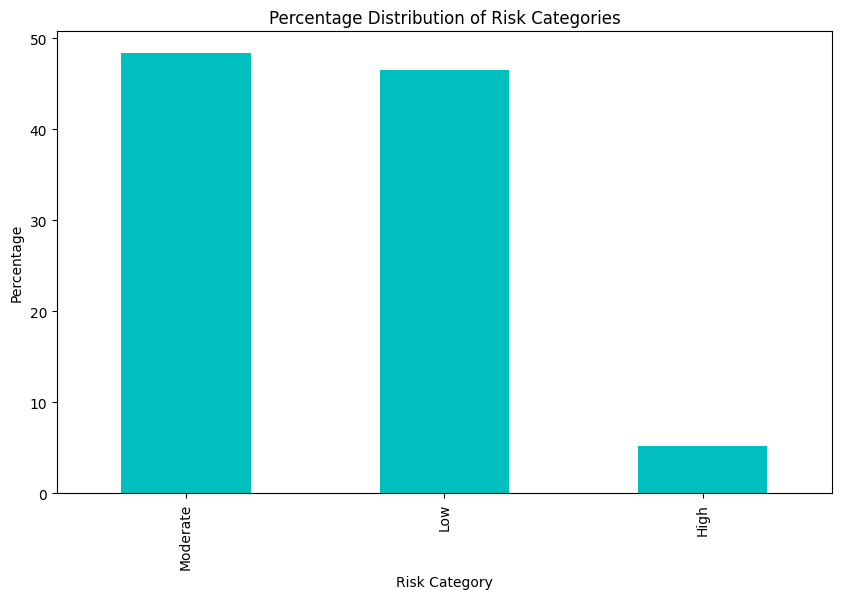

In [71]:
# Count the occurrences of each risk category
risk_category_counts = df['Risk Category'].value_counts()
print(risk_category_counts)

# Calculate the percentage of each risk category
risk_category_percentages = df['Risk Category'].value_counts(normalize=True) * 100
print(risk_category_percentages)


# Plot the percentage distribution of risk categories
plt.figure(figsize=(10, 6))
risk_category_percentages.plot(kind='bar', color='c')
plt.title('Percentage Distribution of Risk Categories')
plt.xlabel('Risk Category')
plt.ylabel('Percentage')
plt.show()


In [77]:
risk_level_summary = df['Risk Category'].value_counts(normalize=True) * 100
print(risk_level_summary)

Risk Category
Low         47.68
Moderate    46.88
High         5.44
Name: proportion, dtype: float64
